In [195]:
# Import libraries
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import normalize

In [196]:
# Visualize data in tabular form
df = pd.read_csv('breast-cancer.csv')
df = df.drop(['id'], axis = 1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [197]:
df['diagnosis'] = np.where(df['diagnosis'] == 'M', 1, 0)

x_, x_test, y_, y_test = train_test_split(df.drop(columns='diagnosis'), df['diagnosis'], test_size=0.2, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_, y_, test_size=0.2, random_state=42)

y_valid

95     1
93     0
401    0
345    0
194    1
      ..
71     0
16     1
346    0
149    0
312    0
Name: diagnosis, Length: 91, dtype: int32

For practical use, we will convert the dataframe into a numpy array. Then we will create the functions necessary for logistic regression

In [198]:
data = df.to_numpy()
print(data)

[[ 1.      17.99    10.38    ...  0.2654   0.4601   0.1189 ]
 [ 1.      20.57    17.77    ...  0.186    0.275    0.08902]
 [ 1.      19.69    21.25    ...  0.243    0.3613   0.08758]
 ...
 [ 1.      16.6     28.08    ...  0.1418   0.2218   0.0782 ]
 [ 1.      20.6     29.33    ...  0.265    0.4087   0.124  ]
 [ 0.       7.76    24.54    ...  0.       0.2871   0.07039]]


In [199]:
data[:,0] = np.where(data[:,0] == 'M', 1, 0)
data = data.astype(np.float64)
print(data)

[[ 0.      17.99    10.38    ...  0.2654   0.4601   0.1189 ]
 [ 0.      20.57    17.77    ...  0.186    0.275    0.08902]
 [ 0.      19.69    21.25    ...  0.243    0.3613   0.08758]
 ...
 [ 0.      16.6     28.08    ...  0.1418   0.2218   0.0782 ]
 [ 0.      20.6     29.33    ...  0.265    0.4087   0.124  ]
 [ 0.       7.76    24.54    ...  0.       0.2871   0.07039]]


In [200]:
output = data[:,0].reshape(-1,1)
input = np.delete(data, 0, axis = 1)
print(output.shape)
print(input.shape)
print(f"output: \n{output}\ninput: \n{input}")

(569, 1)
(569, 30)
output: 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]


In [201]:
def sigmoid(z):
    z = z.astype(float)
    return 1/(1+np.exp(-z))

In [202]:
def logistic_cost(w, b, x, y):
    z = np.dot(x, w) + b
    out = sigmoid(z)
    return np.sum(-y*np.log(out) - (1-y)*np.log(1-out))/len(y)

In [203]:
def calculate(w, b, x):
    return np.dot(w, x) + b

In [204]:
def batch_training(w, b, x, y, iterations, alpha):

    j_history = []
    m = len(x)
    for i in range(iterations):
        z = np.dot(x, w) + b
        y_pred = sigmoid(z).reshape(-1, 1)
        dj_df = (y_pred - y)/m
        dj_dw = np.dot(np.transpose(x), dj_df)
        dj_db = np.sum(dj_df)
        w -= alpha*dj_dw
        b -= alpha*dj_db

        if i < 100000:
            j_history.append(logistic_cost(w, b, x, y))
        
        if i % (iterations/10) == 0 or i == (iterations-1):
            print(f"Iteration: {i}, Cost: {float(j_history[-1]):.2f}")
            
    return w, b, j_history

In [205]:
weights = (np.random.rand(input.shape[1], 1) - 0.5)
bias = np.random.rand()

normalize(input, axis = 0)

array([[0.05180005, 0.02201907, 0.0541219 , ..., 0.08423164, 0.06503422,
        0.05805201],
       [0.05922885, 0.03769547, 0.05857329, ..., 0.05903197, 0.0388707 ,
        0.04346333],
       [0.056695  , 0.04507758, 0.05729517, ..., 0.07712242, 0.05106903,
        0.04276026],
       ...,
       [0.04779771, 0.05956605, 0.04773128, ..., 0.04500395, 0.03135099,
        0.03818055],
       [0.05931523, 0.06221767, 0.06174656, ..., 0.08410469, 0.05776893,
        0.06054205],
       [0.02234399, 0.05205665, 0.02111988, ..., 0.        , 0.04058101,
        0.03436738]])

In [206]:
j= []
weights, bias, j = batch_training(weights, bias, input, output, 10000, 0.00001)

Iteration: 0, Cost: nan


C:\Users\rakra\AppData\Local\Temp\ipykernel_27516\869622612.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))
C:\Users\rakra\AppData\Local\Temp\ipykernel_27516\233072907.py:4: RuntimeWarning: divide by zero encountered in log
  return np.sum(-y*np.log(out) - (1-y)*np.log(1-out))/len(y)
C:\Users\rakra\AppData\Local\Temp\ipykernel_27516\233072907.py:4: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-y*np.log(out) - (1-y)*np.log(1-out))/len(y)


Iteration: 1000, Cost: nan
Iteration: 2000, Cost: nan
Iteration: 3000, Cost: nan
Iteration: 4000, Cost: nan
Iteration: 5000, Cost: nan
Iteration: 6000, Cost: nan
Iteration: 7000, Cost: nan
Iteration: 8000, Cost: nan
Iteration: 9000, Cost: nan
Iteration: 9999, Cost: nan


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

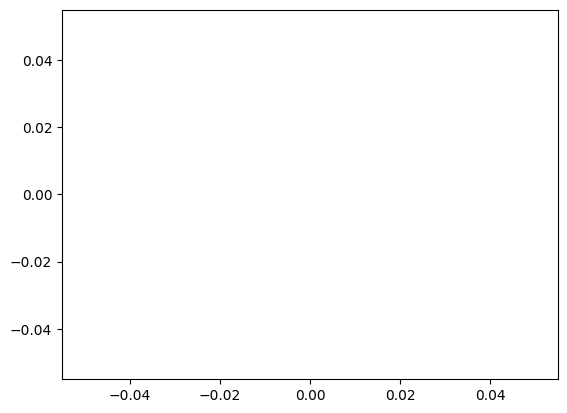

In [207]:
print(j)
plt.plot(j)